# Import Libraries and Load Datasets

First, we imported libraries including **Pandas** (loading datasets), **Numpy** (matrix manipulation), **Matplotlib** and **Seaborn** (visualization), and **Sklearn** (building classifiers).

In [45]:
import warnings
warnings.filterwarnings('ignore')

# Data wrangling & pre-processing
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('classic')

# # Data manipulation & Performance metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, precision_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn import metrics

# Model implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from scipy import stats

In [3]:
#Load covid_train dataset
df_covid = pd.read_csv('covid_train.csv') 
df_covid.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


# Data Cleaning

In [4]:
#Display basic info about data type
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 8 columns):
Age_Group                  14845 non-null object
Client_Gender              14851 non-null object
Case_AcquisitionInfo       14851 non-null object
Reporting_PHU_City         14851 non-null object
Outbreak_Related           5831 non-null object
Reporting_PHU_Latitude     14851 non-null float64
Reporting_PHU_Longitude    14851 non-null float64
Outcome1                   14851 non-null object
dtypes: float64(2), object(6)
memory usage: 928.3+ KB


In [5]:
#Display stats about data
df_covid.describe()

,Reporting_PHU_Latitude,Reporting_PHU_Longitude
count,14851.000000,14851.000000
mean,43.741457,-79.565291
std,0.752952,1.589850
min,42.308796,-94.488254
25%,43.647471,-79.708893
50%,43.656591,-79.379358
75%,43.656591,-79.379358
max,49.769615,-74.736298


In [6]:
#Display number of samples in each class 1-->Resolved, 2-->Not Resolved, 3-->Fatal
df_covid['Outcome1'].value_counts()

Fatal           4951
Not Resolved    4950
Resolved        4950
Name: Outcome1, dtype: int64

In [7]:
#Fill out the missing values with "No"
df_covid['Outbreak_Related'] = df_covid['Outbreak_Related'].fillna('No') 

In [8]:
#Checking for the duplicate values
#df_covid = df_covid.drop_duplicates(keep='first')

In [9]:
#Check for null values ---> We have 6 null values in the age column of our dataset
df_covid.isnull().sum()

Age_Group                  6
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
Outcome1                   0
dtype: int64

In [10]:
#Drop NaN values
df_covid_cleaned_0 = df_covid.dropna()
df_covid_cleaned_0.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


In [11]:
df_covid_cleaned_0['Client_Gender'].unique()

array(['MALE', 'FEMALE', 'UNSPECIFIED', 'GENDER DIVERSE'], dtype=object)

In [12]:
#Drop missing gender
df_covid_cleaned_0 = df_covid_cleaned_0[df_covid_cleaned_0['Client_Gender']!='UNSPECIFIED']

In [13]:
df_covid_cleaned_0['Age_Group'].unique()

array(['50s', '20s', '90s', '60s', '70s', '30s', '80s', '<20', '40s'],
      dtype=object)

In [15]:
#Clean the age_group in COVID dataset column by removing the "s", and replacing <20 by 10s.
df_covid_cleaned_0['Age_Group'] = df_covid_cleaned_0['Age_Group'].replace('<20', '10s')
df_covid_cleaned_0['Age_Group'] = df_covid_cleaned_0['Age_Group'].str[:-1]

In [16]:
#Changing the type of our Age_Group variable
df_covid_cleaned_0['Age_Group'] = df_covid_cleaned_0['Age_Group'].astype(int)

In [17]:
#Change the data format of our columns in the COVID dataset 
#Change the Outbreak_Related data format to binary variable with {1:Yes, 0:No}
df_covid_cleaned_0['Outbreak_Related'] = df_covid_cleaned_0.Outbreak_Related.replace({'Yes':1, 'No':0})

In [18]:
#Change the data format of our columns in the COVID dataset 
#Change the Outcome1 data format to variable with {1:Resolved, 2:Not Resolved, 3:Fatal}
df_covid_cleaned_0['Outcome1'] = df_covid_cleaned_0.Outcome1.replace({'Resolved':1, 'Not Resolved':2, 'Fatal':3})

In [19]:
df_covid_cleaned_0.describe()

,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
count,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000
mean,51.696628,0.391968,43.740751,-79.562821,1.999661
std,26.138483,0.488206,0.751488,1.588955,0.816843
min,10.000000,0.000000,42.308796,-94.488254,1.000000
25%,30.000000,0.000000,43.647471,-79.708893,1.000000
50%,50.000000,0.000000,43.656591,-79.379358,2.000000
75%,80.000000,1.000000,43.656591,-79.379358,3.000000
max,90.000000,1.000000,49.769615,-74.736298,3.000000


Based on the output, we can see the distributions of age_group and outbreak_related are balanced, and there is no need to further process these two features.\
Next, we will look at the geographic data.

In [20]:
numeric_features = ['Age_Group', 'Outbreak_Related', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'] 
EDA_numeric_features = df_covid_cleaned_0.loc[:,numeric_features]

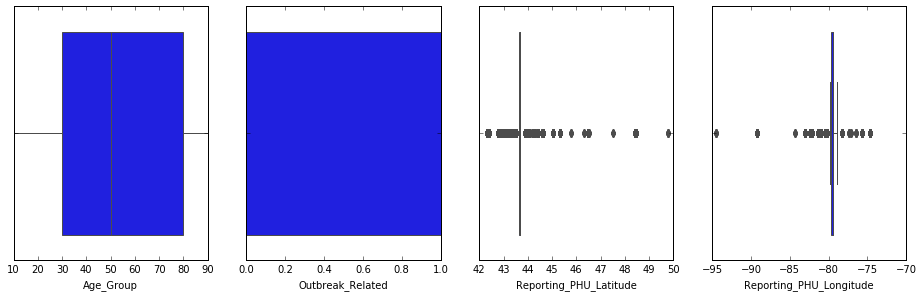

In [21]:
#Box and whiskers plot for detecting the outliers
plt.figure(figsize=(16,10))

for i in range(len(EDA_numeric_features.columns)):
    plt.subplot(2,4,i + 1)
    sns.boxplot(EDA_numeric_features[EDA_numeric_features.columns[i]])

In [22]:
# Calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(EDA_numeric_features))

In [23]:
# Defining threshold for filtering outliers
threshold = 3
#np.where(z>3)

In [24]:
# Filtering outliers retaining only those data points which are below threshold
df_covid_cleaned_0 = df_covid_cleaned_0[(z<3).all(axis=1)]

In [25]:
#Onehot encode function definition
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df=pd.concat([df, dummies], axis=1)
        df=df.drop(column, axis=1)
    return df

In [26]:
#Onehot encoding of COVID data
df_covid_cleaned = df_covid_cleaned_0
nominal_features = ['Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City']
df_covid_cleaned = onehot_encode(df_covid_cleaned, dict(zip(nominal_features, ['CG','CA', 'RC'])))
df_covid_cleaned.head()

,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,CG_FEMALE,CG_GENDER DIVERSE,CG_MALE,CA_CC,CA_MISSING INFORMATION,...,RC_Point Edward,RC_Port Hope,RC_Simcoe,RC_St. Thomas,RC_Stratford,RC_Thorold,RC_Toronto,RC_Waterloo,RC_Whitby,RC_Windsor
0,50,0,43.413997,-79.744796,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,43.524881,-80.233743,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,90,1,44.410713,-79.686306,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,43.656591,-79.379358,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,90,1,45.345665,-75.763912,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Display number of samples in each class 1-->Resolved, 2-->Not Resolved, 3-->Fatal
df_covid_cleaned['Outcome1'].value_counts()

3    4828
1    4817
2    4750
Name: Outcome1, dtype: int64

In [28]:
df_covid_cleaned.to_csv('covid_cleaned.csv')

# Tree-based Classifiers and Ensembles

## Decision Tree

In [29]:
#Split the data into train and test sets
X_2 = df_covid_cleaned.drop('Outcome1',axis=1,inplace=False)
y_2 = df_covid_cleaned['Outcome1']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

In [73]:
#Mean accuracy versus the maximum tree depth calculation
DT_depth = [3, 5, 10, None]
DT_score_list = []

for d in DT_depth:
    DT_clf = DecisionTreeClassifier(max_depth = d)
    DT_scores = cross_val_score(DT_clf, X_train_2, y_train_2, cv=10)
    DT_mean_score = np.mean(DT_scores)
    DT_score_list.append(DT_mean_score)

print(DT_depth)
print(DT_score_list)

[3, 5, 10, None]
[0.654307546577855, 0.6543933717057631, 0.6602980349213243, 0.6457088190221064]


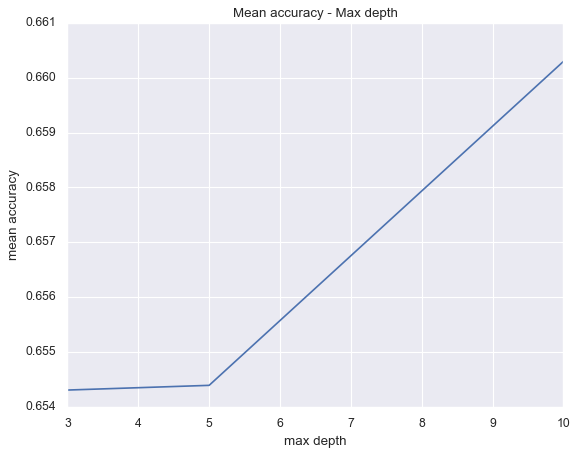

In [74]:
#Plot mean accuracy versus the maximum tree depth
plt.title('Mean accuracy - Max depth')
plt.xlabel('max depth')
plt.ylabel('mean accuracy')
plt.plot(DT_depth, DT_score_list);

In [75]:
#Evaluate the performance of the decision tree classifier with maximum tree depth of 10
dt_clf = DecisionTreeClassifier(max_depth=10).fit(X_train_2, y_train_2)

print('Accuracy of Decision Tree classifier on training set: {:.5f}'
     .format(dt_clf.score(X_train_2, y_train_2)))
print('Accuracy of Decision Tree classifier on test set: {:.5f}'
     .format(dt_clf.score(X_test_2, y_test_2)))

Accuracy of Decision Tree classifier on training set: 0.69434
Accuracy of Decision Tree classifier on test set: 0.65439


**According to the result of the model on cross validation set using different max_depth, the best max_depth parameter for the Decision Tree classifier is 10, as max_depth = 10 provides the highest accuracy in the 10-fold cross validation. The accuracy of the model is 69.43% on the training set and is 65.37% on the test set for the wheat seeds dataset.**

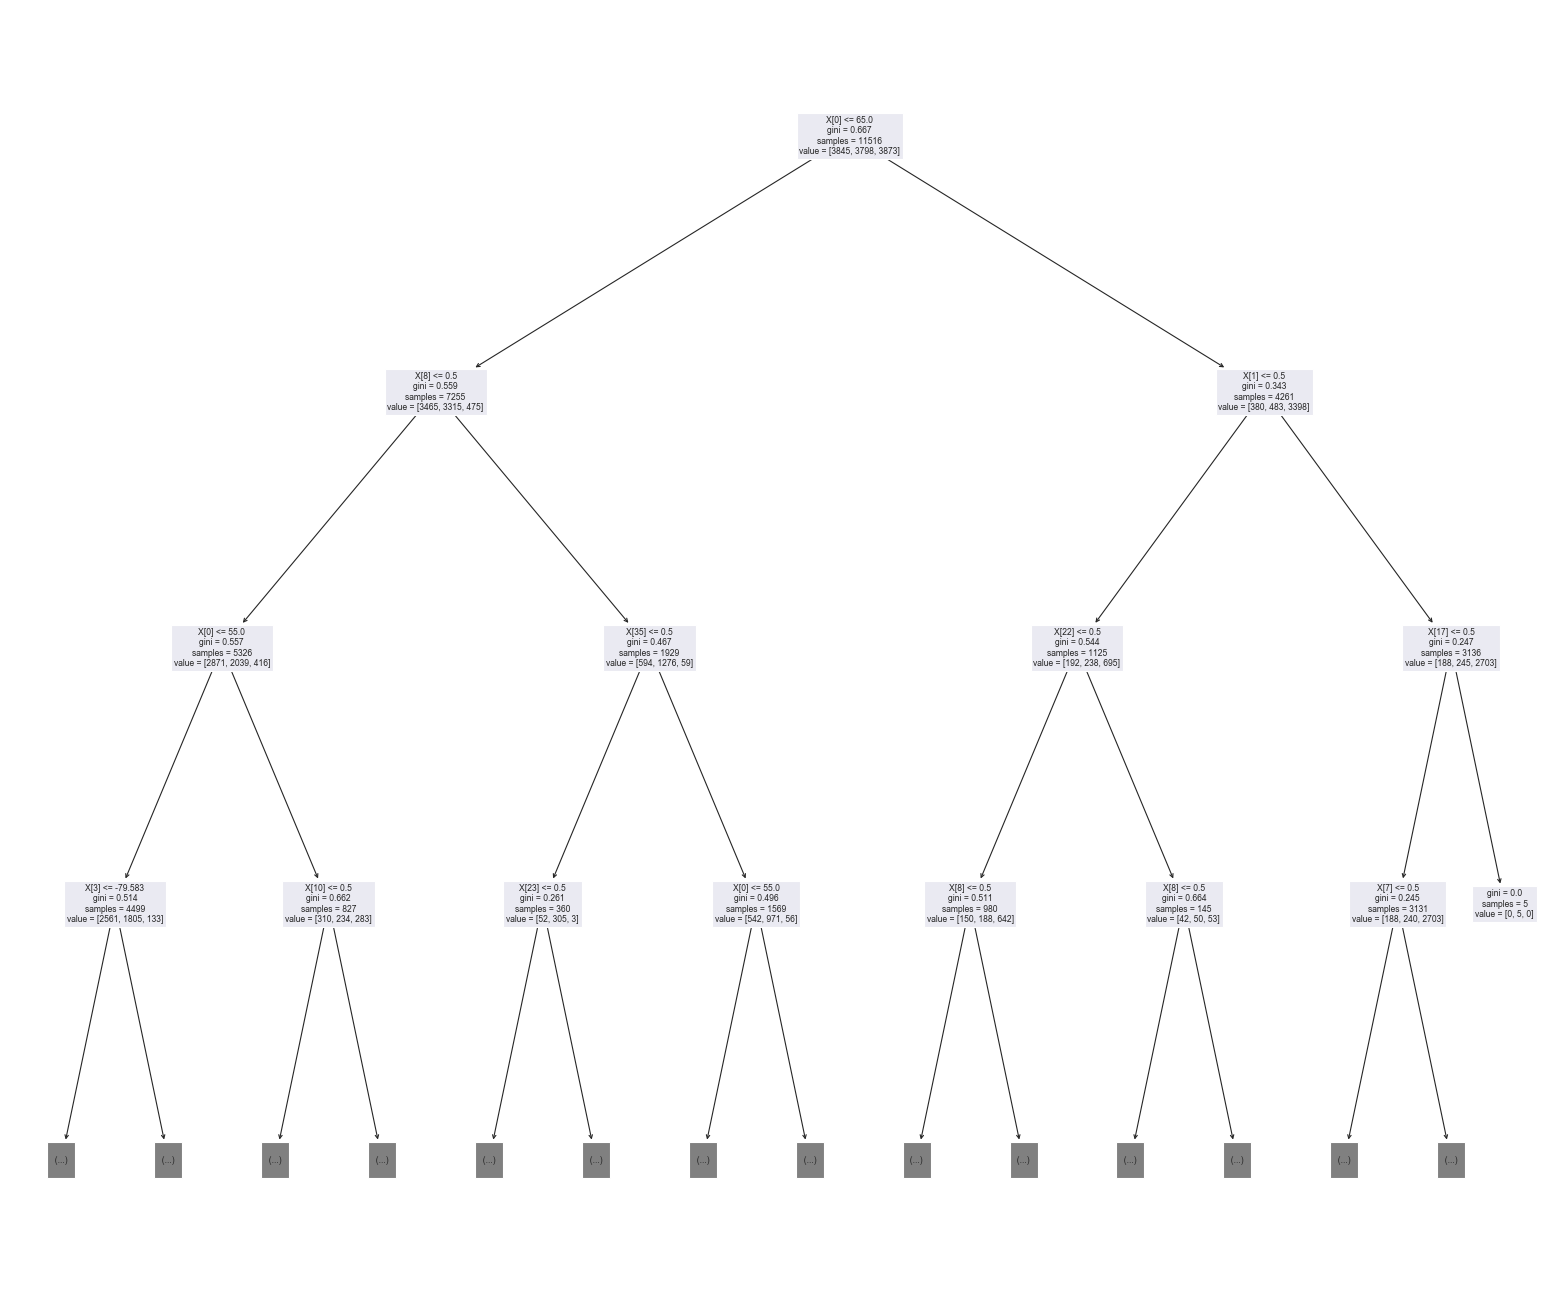

In [69]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf,max_depth=3)

**(Note: The optimal max_depth is 10 in this case. For visualization, to make the graph easy to read and interpret, only the part within depth of 3 is being presented.)\
From the above, we can conclude that\
1) Age is a dominant element affecting the outcome of catching Coivd, and it occurs at several judging criteria in this decision tree. If a person is younger than 70s, then the fatal rate is relatively low. (indicated by X[0])\
2) There are much more cases in Toronto and Mississauga than in other areas (indicated by X[35] and X[22])\
3) If a case is outbreak related, then the fatal rate is higher. (indicated by X[1])\
4) For those cases whose case acquisition method is missing, the percentage of unresolved cases is higher compared with those having a clear acquisition method (indicated by X[8]).**

## Random Forest

In [32]:
#Create Random Forest Matrix
RF_trees = {0:5, 1:10, 2:50, 3:150, 4:200}
RF_depth = {0:3, 1:5, 2:10, 3:None}
RF_matrix = np.mat(np.zeros((len(RF_trees), len(RF_depth))))
print(np.shape(RF_matrix))
RF_matrix

(5, 4)


matrix([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [33]:
#Calculating the mean accuracies for different values of number of trees and maximum depth
for t in RF_trees.keys():
    for d in RF_depth.keys():
        RF_clf = RandomForestClassifier(n_estimators=RF_trees[t], max_depth=RF_depth[d])
        RF_scores = cross_val_score(RF_clf, X_train_2, y_train_2, cv=10)
        RF_matrix[t,d] = np.mean(RF_scores)
RF_matrix

matrix([[0.62088009, 0.64562812, 0.66003815, 0.6451898 ],
        [0.6314721 , 0.65639367, 0.66880883, 0.6522218 ],
        [0.63320693, 0.65586846, 0.66880928, 0.64996538],
        [0.63025253, 0.66281683, 0.67123953, 0.65005113],
        [0.63563598, 0.66542175, 0.67228127, 0.65057212]])

In [34]:
#Coverting the matrix to a dataframe
RF_mean_score = pd.DataFrame(RF_matrix,columns=RF_depth.values(),index=RF_trees.values())
RF_mean_score

,3,5,10,NaN
5,0.620880,0.645628,0.660038,0.645190
10,0.631472,0.656394,0.668809,0.652222
50,0.633207,0.655868,0.668809,0.649965
150,0.630253,0.662817,0.671240,0.650051
200,0.635636,0.665422,0.672281,0.650572


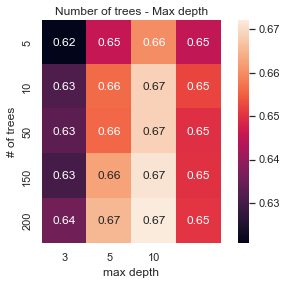

In [35]:
#Plotting a heat plot for the Wheat Seeds dataset
sns.set()
ax = sns.heatmap(RF_mean_score, square=True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('max depth')
plt.ylabel('# of trees')
plt.title('Number of trees - Max depth');

In [36]:
#Evaluate the performance of the random forest classifier with 200 trees and maximum tree depth of 10
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10).fit(X_train_2, y_train_2)

print('Accuracy of Random Forest classifier on training set: {:.5f}'
     .format(rf_clf.score(X_train_2, y_train_2)))
print('Accuracy of Random Forest classifier on test set: {:.5f}'
     .format(rf_clf.score(X_test_2, y_test_2)))

Accuracy of Random Forest classifier on training set: 0.70146
Accuracy of Random Forest classifier on test set: 0.66134


**According to the result of the model on cross validation set using different max_depth and the number of trees, the best max_depth parameter is 10, and the best number of trees parameter is 200. The accuracy of the model is 70.15% on the training set and is 66.13% on the test set.**

## Gradient Boosting Classifier

In [38]:
#Mean accuracy versus the number of estimators calculation
GBT_n = [5, 10, 50, 150, 200]
GBT_score_list = []

for n in GBT_n:
    GBT_clf = GradientBoostingClassifier(n_estimators=n)
    GBT_scores = cross_val_score(GBT_clf, X_train_2, y_train_2, cv=10)
    GBT_mean_score = np.mean(GBT_scores)
    GBT_score_list.append(GBT_mean_score)

print(GBT_n)
print(GBT_score_list)

[5, 10, 50, 150, 200]
[0.6616884321604404, 0.662643444106574, 0.6702851988608939, 0.6702840675982238, 0.6716740877497829]


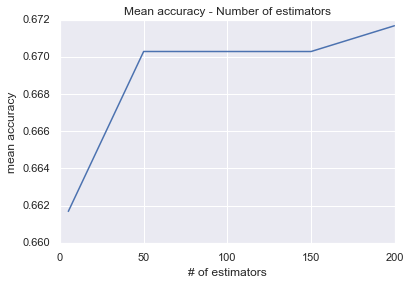

In [39]:
#Plotting mean accuracy versus the number of estimators
plt.figure()
plt.title('Mean accuracy - Number of estimators')
plt.xlabel('# of estimators')
plt.ylabel('mean accuracy')
plt.plot(GBT_n, GBT_score_list);

In [40]:
#Evaluate the performance of the gradient boosting classifier with 200 estimators
gbt_clf = GradientBoostingClassifier(n_estimators=200).fit(X_train_2, y_train_2)

print('Accuracy of Gradient Boosting classifier on training set: {:.5f}'
     .format(gbt_clf.score(X_train_2, y_train_2)))
print('Accuracy of Gradient Boosting classifier on test set: {:.5f}'
     .format(gbt_clf.score(X_test_2, y_test_2)))

Accuracy of Gradient Boosting classifier on training set: 0.69034
Accuracy of Gradient Boosting classifier on test set: 0.66725


**According to the result of the model on cross validation set using different n_estimators, the best n_estimator parameter is 200. The accuracy of the model is 69.03% on the training set and is 66.73% on the test set.**

# Naive Bayes Classifier

In [77]:
#Mean accuracy versus the var_smoothing calculation
NB_var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
NB_score_list = []

for var in NB_var_smoothing:
    NB_clf = GaussianNB(var_smoothing=var)
    NB_scores = cross_val_score(NB_clf, X_train_2, y_train_2, cv=10)
    NB_mean_score = np.mean(NB_scores)
    NB_score_list.append(NB_mean_score)

print(NB_var_smoothing)
print(NB_score_list)

[1e-10, 1e-09, 1e-05, 0.001, 0.1]
[0.5547939141085048, 0.5547945174485955, 0.5890924407520031, 0.639716596075876, 0.5921317664591177]


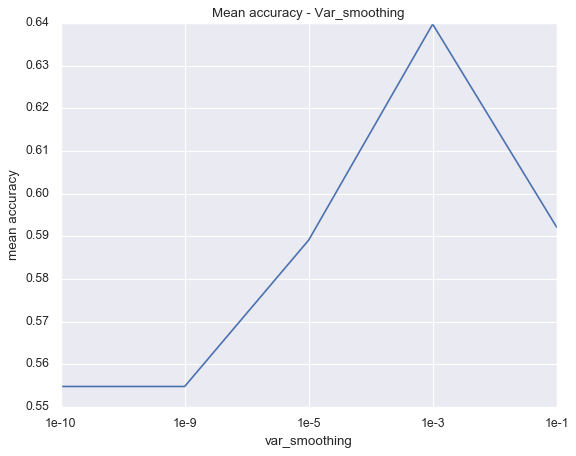

In [78]:
#Plot mean accuracy versus the var_smoothing
values = ['1e-10','1e-9','1e-5','1e-3','1e-1']
var_smoothing_label = [1,2,3,4,5]
plt.title('Mean accuracy - Var_smoothing')
plt.xlabel('var_smoothing')
plt.ylabel('mean accuracy')
plt.xticks(var_smoothing_label,values)
plt.plot(var_smoothing_label, NB_score_list);

### Impact of the smoothing parameter
**Based on the documentation, var_smoothing is the 'portion of the largest variance of all features that is added to variances for calculation stability'. As the var_smoothing increases, it widens/smooths the curve and accounts for more samples that are further away from the distribution mean, which might reduce overfitting and improve the model performance.\
From the above graph, we can see that with var_smoothing increasing, the model performance increases a lot. However, after some certain point, increasing var_smoothing further makes no difference or even decreases the model accuracy, as too large var_smoothing may make the model too generalized. In this case, based on the graph and the above explanations, we should choose var_smoothing equal to 1e-3.**

In [79]:
#Evaluate the performance of the naive bayes classifier with var_smoothing equal to 1e-1
nb_clf = GaussianNB(var_smoothing=1e-3).fit(X_train_2, y_train_2)

print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.5f}'
     .format(nb_clf.score(X_train_2, y_train_2)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.5f}'
     .format(nb_clf.score(X_test_2, y_test_2)))

Accuracy of Gaussian Naive Bayes classifier on training set: 0.64033
Accuracy of Gaussian Naive Bayes classifier on test set: 0.64328


**According to the result of the model on cross validation set using different var_smoothing, the best var_smoothing parameter is 1e-3. The accuracy of the model is 64.03% on the training set and is 64.33% on the test set.**

In [43]:
pred = nb_clf.predict(X_test_2)
acc = accuracy_score(y_test_2,pred)
pre = precision_score(y_test_2,pred,average='macro')
recall = recall_score(y_test_2,pred,average='macro')
f = f1_score(y_test_2,pred,average='macro')
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test accuracy score is "+str(acc))
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test precision score is "+str(pre))
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test recall score is "+str(recall))
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test f1 score is "+str(f))

For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test accuracy score is 0.6432789162903786
For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test precision score is 0.6293890433375453
For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test recall score is 0.6434491121335958
For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test f1 score is 0.6327331255692171


# Further data processing to compare model performance

Since tree-based classifers and Naive Bayes classifier are not distance-based, feature scaling such as normalization is not necessary.\
In this case, since we have a lot of dummy variables, it does not make much sense to plot the pairplot. But when looking at the features again, we can see that the reporting PHU's city and the reporting PHU's longitude/latitude should be related. As we are only looking at the cases in Sountern Ontario, there is not much variance in the longitude/latitude, so we remove these two features and see whether it improves the model performance.

In [47]:
df_covid_cleaned_new = df_covid_cleaned.drop(['Reporting_PHU_Latitude','Reporting_PHU_Longitude'],axis=1)
df_covid_cleaned_new.head()

,Age_Group,Outbreak_Related,Outcome1,CG_FEMALE,CG_GENDER DIVERSE,CG_MALE,CA_CC,CA_MISSING INFORMATION,CA_NO KNOWN EPI LINK,CA_OB,...,RC_Point Edward,RC_Port Hope,RC_Simcoe,RC_St. Thomas,RC_Stratford,RC_Thorold,RC_Toronto,RC_Waterloo,RC_Whitby,RC_Windsor
0,50,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,20,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,90,1,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Next, implementing the Decision Tree classifier and Naive Bayes classifier with 10 cross validation using the subset of features. (Random forest and Gradient boosting derive from the decision tree, so only the performance of decision tree is compared for tree-based classifiers.)

In [48]:
#Split the data into train and test sets
X_2_new = df_covid_cleaned_new.drop('Outcome1',axis=1,inplace=False)
y_2_new = df_covid_cleaned_new['Outcome1']

X_train_2_new, X_test_2_new, y_train_2_new, y_test_2_new = train_test_split(X_2_new, y_2_new, test_size=0.2, random_state=0)

## Decision Tree (subset of features)

In [70]:
#Mean accuracy versus the maximum tree depth calculation
DT_depth = [3, 5, 10, None]
DT_score_list = []

for d in DT_depth:
    DT_clf = DecisionTreeClassifier(max_depth = d)
    DT_scores = cross_val_score(DT_clf, X_train_2_new, y_train_2_new, cv=10)
    DT_mean_score = np.mean(DT_scores)
    DT_score_list.append(DT_mean_score)

print(DT_depth)
print(DT_score_list)

[3, 5, 10, None]
[0.654307546577855, 0.6593431738102133, 0.6619465863017665, 0.6463164579109952]


In [71]:
#Evaluate the performance of the decision tree classifier with maximum tree depth of 10
dt_clf = DecisionTreeClassifier(max_depth=10).fit(X_train_2_new, y_train_2_new)

print('Accuracy of Decision Tree classifier on training set (subset of features): {:.5f}'
     .format(dt_clf.score(X_train_2_new, y_train_2_new)))
print('Accuracy of Decision Tree classifier on test set (subset of features): {:.5f}'
     .format(dt_clf.score(X_test_2_new, y_test_2_new)))

Accuracy of Decision Tree classifier on training set (subset of features): 0.68696
Accuracy of Decision Tree classifier on test set (subset of features): 0.65127


## Naive Bayes Classifier (subset of features)

In [51]:
#Mean accuracy versus the var_smoothing calculation
NB_var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
NB_score_list = []

for var in NB_var_smoothing:
    NB_clf = GaussianNB(var_smoothing=var)
    NB_scores = cross_val_score(NB_clf, X_train_2_new, y_train_2_new, cv=10)
    NB_mean_score = np.mean(NB_scores)
    NB_score_list.append(NB_mean_score)

print(NB_var_smoothing)
print(NB_score_list)

[1e-10, 1e-09, 1e-05, 0.001, 0.1]
[0.5585279859301091, 0.5588755098223767, 0.5907431038227628, 0.6584754953422145, 0.5921317664591177]


In [52]:
#Evaluate the performance of the naive bayes classifier with var_smoothing equal to 1e-3
nb_clf = GaussianNB(var_smoothing=1e-3).fit(X_train_2_new, y_train_2_new)

print('Accuracy of Gaussian Naive Bayes classifier on training set (subset of features): {:.5f}'
     .format(nb_clf.score(X_train_2_new, y_train_2_new)))
print('Accuracy of Gaussian Naive Bayes classifier on test set (subset of features): {:.5f}'
     .format(nb_clf.score(X_test_2_new, y_test_2_new)))

Accuracy of Gaussian Naive Bayes classifier on training set (subset of features): 0.65934
Accuracy of Gaussian Naive Bayes classifier on test set (subset of features): 0.65648


Based on the outputs, for the subset of features, Naive Bayes Classifier has a better performance while the Decision Tree stays almost the same. To compare further, we implement the other two tree-based classifiers to decide.

## A further step - Categorical Naive Bayes classifier

In [109]:
#Mean accuracy versus the alpha calculation
CNB_alpha = [0.01,0.1,1,10,100]
CNB_score_list = []

for alpha in CNB_alpha:
    CNB_clf = CategoricalNB(alpha=alpha)
    CNB_scores = cross_val_score(CNB_clf, X_train_2_new, y_train_2_new, cv=10)
    CNB_mean_score = np.mean(CNB_scores)
    CNB_score_list.append(CNB_mean_score)

print(CNB_alpha)
print(CNB_score_list)

[0.01, 0.1, 1, 10, 100]
[nan, nan, nan, nan, nan]


In [110]:
CNB_clf = CategoricalNB(alpha=alpha)
CNB_scores = cross_val_score(CNB_clf, X_train_2_new, y_train_2_new, cv=10)
CNB_scores

array([0.59201389, 0.61979167, 0.609375  ,        nan, 0.59288194,
       0.59201389, 0.58818419, 0.60556038, 0.58992181, 0.60816681])

In [113]:
CNB_alpha = [0.01,0.1,1,10,100]
for alpha in CNB_alpha:
    cnb_clf = CategoricalNB(alpha=alpha).fit(X_train_2_new, y_train_2_new)
    score = cnb_clf.score(X_train_2_new, y_train_2_new)
    print('training accuracy with alpha equal to'+' '+str(alpha)+' '+'is'+' '+str(score))

training accuracy with alpha equal to 0.01 is 0.6265196248697464
training accuracy with alpha equal to 0.1 is 0.6265196248697464
training accuracy with alpha equal to 1 is 0.6266064605765891
training accuracy with alpha equal to 10 is 0.622612018061827
training accuracy with alpha equal to 100 is 0.6006425842306357


## Random Forest (subset of features)

In [53]:
#Create Random Forest Matrix
RF_trees = {0:5, 1:10, 2:50, 3:150, 4:200}
RF_depth = {0:3, 1:5, 2:10, 3:None}
RF_matrix = np.mat(np.zeros((len(RF_trees), len(RF_depth))))
print(np.shape(RF_matrix))
RF_matrix

(5, 4)


matrix([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [54]:
#Calculating the mean accuracies for different values of number of trees and maximum depth
for t in RF_trees.keys():
    for d in RF_depth.keys():
        RF_clf = RandomForestClassifier(n_estimators=RF_trees[t], max_depth=RF_depth[d])
        RF_scores = cross_val_score(RF_clf, X_train_2_new, y_train_2_new, cv=10)
        RF_matrix[t,d] = np.mean(RF_scores)
RF_matrix

matrix([[0.62912413, 0.63607333, 0.66307702, 0.64805408],
        [0.62834273, 0.64866126, 0.66472678, 0.64909635],
        [0.64405951, 0.65968926, 0.66915514, 0.65352539],
        [0.62999302, 0.66429313, 0.67054479, 0.65135337],
        [0.63650645, 0.66359876, 0.67037065, 0.65369893]])

In [55]:
#Coverting the matrix to a dataframe
RF_mean_score = pd.DataFrame(RF_matrix,columns=RF_depth.values(),index=RF_trees.values())
RF_mean_score

,3,5,10,NaN
5,0.629124,0.636073,0.663077,0.648054
10,0.628343,0.648661,0.664727,0.649096
50,0.644060,0.659689,0.669155,0.653525
150,0.629993,0.664293,0.670545,0.651353
200,0.636506,0.663599,0.670371,0.653699


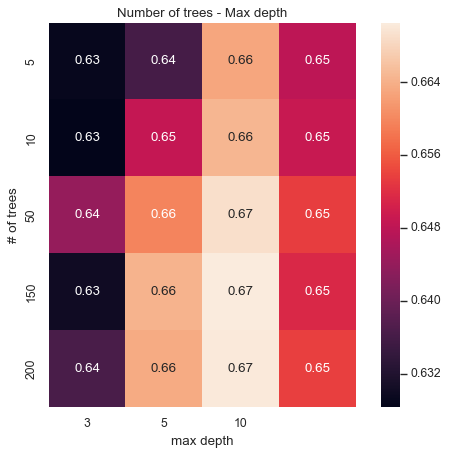

In [56]:
#Plotting a heat plot for the Wheat Seeds dataset
sns.set()
ax = sns.heatmap(RF_mean_score, square=True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('max depth')
plt.ylabel('# of trees')
plt.title('Number of trees - Max depth');

In [57]:
#Evaluate the performance of the random forest classifier with 50 trees and maximum tree depth of 10
rf_clf = RandomForestClassifier(n_estimators=150, max_depth=10).fit(X_train_2_new, y_train_2_new)

print('Accuracy of Random Forest classifier on training set (subset of features): {:.5f}'
     .format(rf_clf.score(X_train_2_new, y_train_2_new)))
print('Accuracy of Random Forest classifier on test set (subset of features): {:.5f}'
     .format(rf_clf.score(X_test_2_new, y_test_2_new)))

Accuracy of Random Forest classifier on training set (subset of features): 0.69634
Accuracy of Random Forest classifier on test set (subset of features): 0.66551


## Gradient Boosting Classifier (subset of features)

In [58]:
#Mean accuracy versus the number of estimators
GBT_n = [5, 10, 50, 150, 200]
GBT_score_list = []

for n in GBT_n:
    GBT_clf = GradientBoostingClassifier(n_estimators=n)
    GBT_scores = cross_val_score(GBT_clf, X_train_2_new, y_train_2_new, cv=10)
    GBT_mean_score = np.mean(GBT_scores)
    GBT_score_list.append(GBT_mean_score)

print(GBT_n)
print(GBT_score_list)

[5, 10, 50, 150, 200]
[0.6621226107732407, 0.6617749360459505, 0.6723686076117386, 0.6710658455208032, 0.6702843692682692]


In [59]:
#Evaluate the performance of the gradient boosting classifier with 50 estimators
gbt_clf = GradientBoostingClassifier(n_estimators=50).fit(X_train_2_new, y_train_2_new)

print('Accuracy of Gradient Boosting classifier on training set (subset of features): {:.5f}'
     .format(gbt_clf.score(X_train_2_new, y_train_2_new)))
print('Accuracy of Gradient Boosting classifier on test set (subset of features): {:.5f}'
     .format(gbt_clf.score(X_test_2_new, y_test_2_new)))

Accuracy of Gradient Boosting classifier on training set (subset of features): 0.67662
Accuracy of Gradient Boosting classifier on test set (subset of features): 0.66759


After comparing the model performance for the 4 classifiers, we can see there is a small increase for the naive bayes classifier, but the performance of tree-based classifiers almost stay the same. So we can conclude that dropping the longitude and latitude will not affect the model accuracy that much, and it is ok to keep the dataset with all the features.

# Further data processing 2 (duplicates)

We notice that in the Covid dataset, there are a lot of duplicates. We try to remove the duplicates and see whether the model performance improves.

In [60]:
df_covid_cleaned_new_2 = df_covid_cleaned.drop_duplicates(keep='first')

In [61]:
df_covid_cleaned_new_2

,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,CG_FEMALE,CG_GENDER DIVERSE,CG_MALE,CA_CC,CA_MISSING INFORMATION,...,RC_Point Edward,RC_Port Hope,RC_Simcoe,RC_St. Thomas,RC_Stratford,RC_Thorold,RC_Toronto,RC_Waterloo,RC_Whitby,RC_Windsor
0,50,0,43.413997,-79.744796,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,43.524881,-80.233743,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,90,1,44.410713,-79.686306,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,43.656591,-79.379358,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,90,1,45.345665,-75.763912,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,50,0,44.410713,-79.686306,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14792,60,1,42.847825,-80.303815,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14797,80,1,43.257631,-79.871341,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14805,10,0,43.368662,-81.001913,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Next, implementing the Decision Tree classifier and Naive Bayes classifier with 10 cross validation using the cleaned dataset without duplicates. (Random forest and Gradient boosting derive from the decision tree, so only the performance of decision tree is compared for tree-based classifiers.)

In [62]:
#Split the data into train and test sets
X_2_new_2 = df_covid_cleaned_new_2.drop('Outcome1',axis=1,inplace=False)
y_2_new_2 = df_covid_cleaned_new_2['Outcome1']

X_train_2_new_2, X_test_2_new_2, y_train_2_new_2, y_test_2_new_2 = train_test_split(X_2_new_2, y_2_new_2, test_size=0.2, random_state=0)

## Decision Tree (without duplicates)

In [63]:
#Mean accuracy versus the maximum tree depth calculation
DT_depth = [3, 5, 10, None]
DT_score_list = []

for d in DT_depth:
    DT_clf = DecisionTreeClassifier(max_depth = d)
    DT_scores = cross_val_score(DT_clf, X_train_2_new_2, y_train_2_new_2, cv=10)
    DT_mean_score = np.mean(DT_scores)
    DT_score_list.append(DT_mean_score)

print(DT_depth)
print(DT_score_list)

[3, 5, 10, None]
[0.4868737627531597, 0.4753083599817268, 0.38831531394345464, 0.2258438657936145]


In [64]:
#Evaluate the performance of the decision tree classifier with maximum tree depth of 3
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_train_2_new_2, y_train_2_new_2)

print('Accuracy of Decision Tree classifier on training set (without duplicates): {:.5f}'
     .format(dt_clf.score(X_train_2_new_2, y_train_2_new_2)))
print('Accuracy of Decision Tree classifier on test set (without duplicates): {:.5f}'
     .format(dt_clf.score(X_test_2_new_2, y_test_2_new_2)))

Accuracy of Decision Tree classifier on training set (without duplicates): 0.50000
Accuracy of Decision Tree classifier on test set (without duplicates): 0.46076


## Naive Bayes Classifier (without duplicates)

In [65]:
#Mean accuracy versus the var_smoothing calculation
NB_var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
NB_score_list = []

for var in NB_var_smoothing:
    NB_clf = GaussianNB(var_smoothing=var)
    NB_scores = cross_val_score(NB_clf, X_train_2_new_2, y_train_2_new_2, cv=10)
    NB_mean_score = np.mean(NB_scores)
    NB_score_list.append(NB_mean_score)

print(NB_var_smoothing)
print(NB_score_list)

[1e-10, 1e-09, 1e-05, 0.001, 0.1]
[0.3732500888279783, 0.375262677021471, 0.404408405664687, 0.46375057103700323, 0.4667808740673062]


In [66]:
#Evaluate the performance of the naive bayes classifier with var_smoothing equal to 1e-1
nb_clf = GaussianNB(var_smoothing=1e-1).fit(X_train_2_new_2, y_train_2_new_2)

print('Accuracy of Gaussian Naive Bayes classifier on training set (without duplicates): {:.5f}'
     .format(nb_clf.score(X_train_2_new_2, y_train_2_new_2)))
print('Accuracy of Gaussian Naive Bayes classifier on test set (without duplicates): {:.5f}'
     .format(nb_clf.score(X_test_2_new_2, y_test_2_new_2)))

Accuracy of Gaussian Naive Bayes classifier on training set (without duplicates): 0.46831
Accuracy of Gaussian Naive Bayes classifier on test set (without duplicates): 0.44266


Based on the outputs, for the dataset without duplicates, the model accuracy on the training and test sets are much lower in both classifiers compared with the original dataset.\
Based on all of the above, we should choose the cleaned covid dataset with duplicates, but drop the longitude and latitude.

# Comaparison of learned parameters in Decision Tree and Naive Bayes

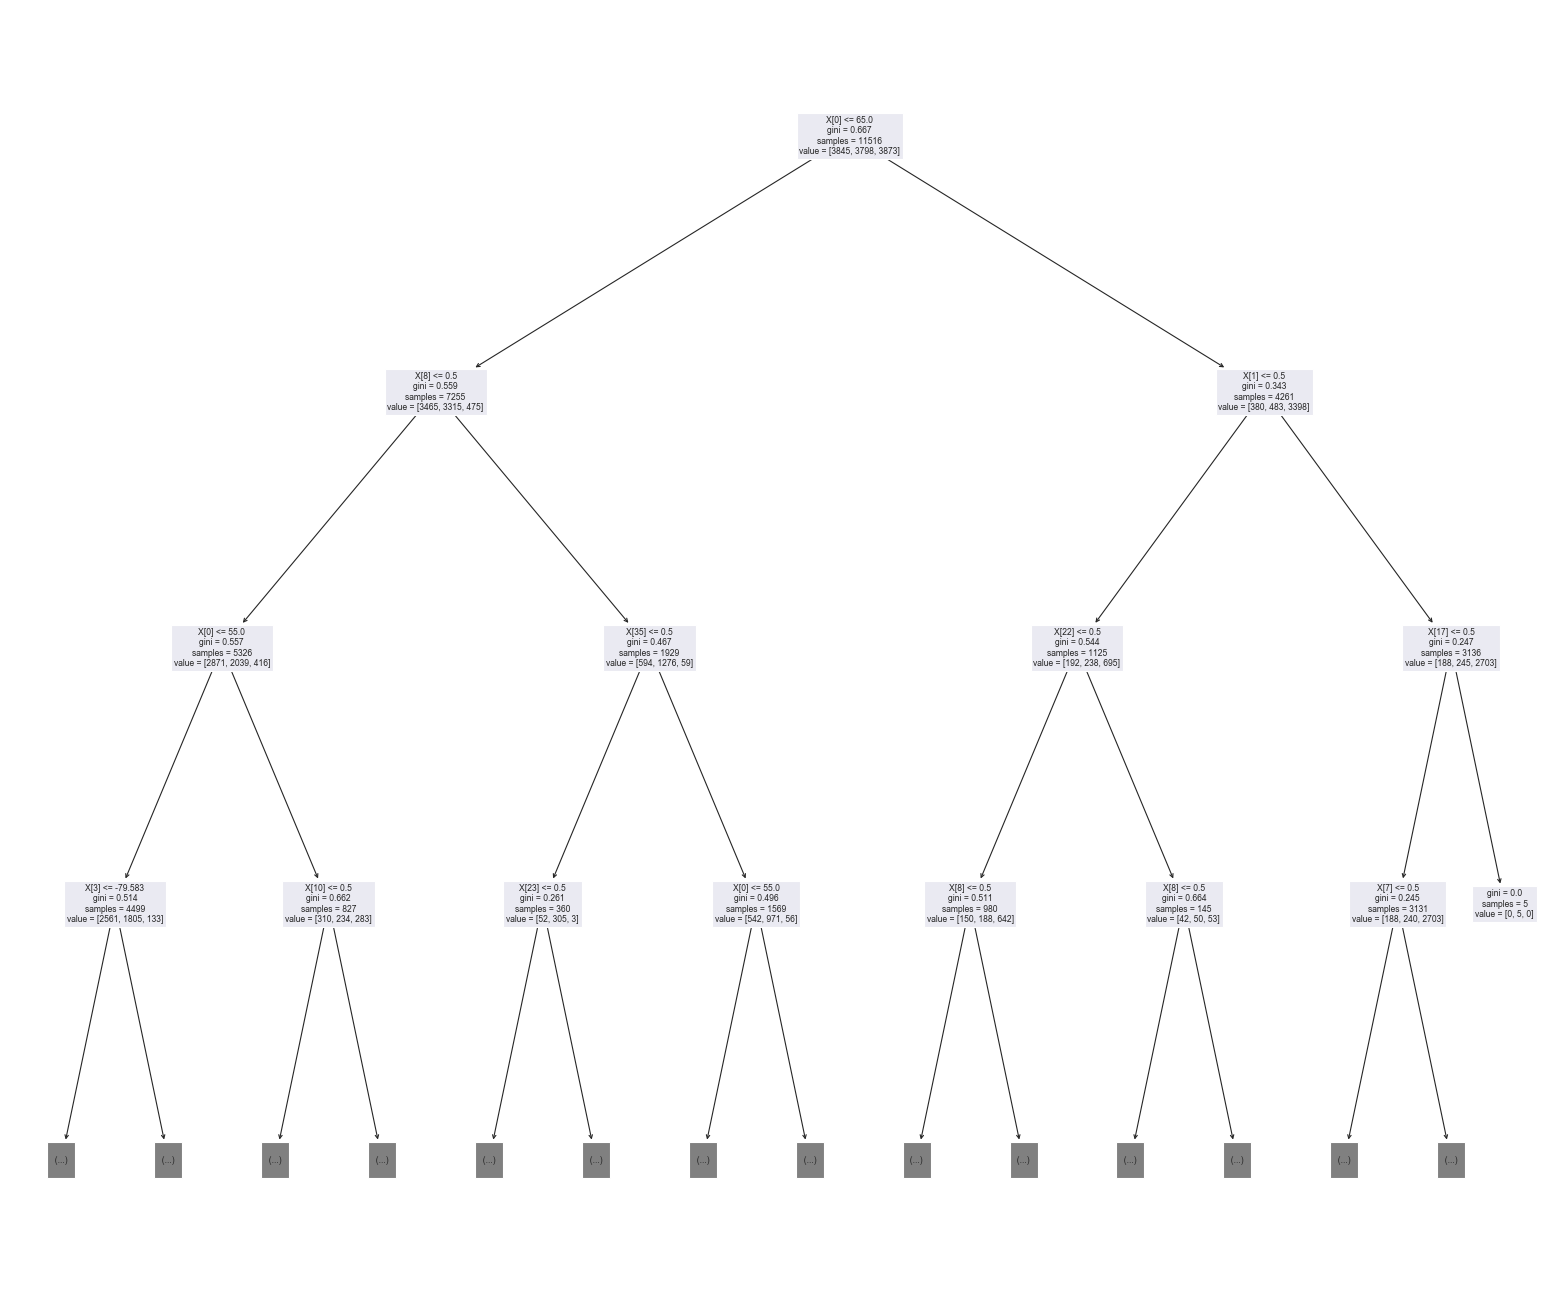

In [76]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf,max_depth=3)

**(Note: The optimal max_depth is 10 in this case. For visualization, to make the graph easy to read and interpret, only the part within depth of 3 is being presented.)\
From the above, we can conclude that\
1) Age is a dominant element affecting the outcome of catching Coivd, and it occurs at several judging criteria in this decision tree. If a person is younger than 70s, then the fatal rate is relatively low. (indicated by X[0])\
2) There are much more cases in Toronto and Mississauga than in other areas (indicated by X[35] and X[22])\
3) If a case is outbreak related, then the fatal rate is higher. (indicated by X[1])\
4) For those cases whose case acquisition method is missing, the percentage of unresolved cases is higher compared with those having a clear acquisition method (indicated by X[8]).**

**Next, we plot the distributions of these features using the learned parameters in Naive Bayes classifier.**

In [91]:
nb_clf.theta_

array([[ 3.73966190e+01,  2.02340702e-01,  4.36749280e+01,
        -7.95727791e+01,  4.95448635e-01,  2.60078023e-04,
         5.04291287e-01,  4.37711313e-01,  1.65409623e-01,
         2.04941482e-01,  1.72691808e-01,  1.84655397e-02,
         7.80234070e-04,  2.28868661e-02,  1.82054616e-03,
         7.80234070e-03,  3.12093628e-03,  5.46163849e-03,
         1.61248375e-02,  2.91287386e-02,  2.08062419e-03,
         2.00260078e-02,  2.08842653e-01,  9.44083225e-02,
         3.17295189e-02,  5.17555267e-02,  2.60078023e-03,
         7.80234070e-04,  2.34070221e-03,  6.76202861e-03,
         3.90117035e-03,  6.50195059e-03,  6.76202861e-03,
         3.64109233e-03,  2.93888166e-02,  3.13914174e-01,
         3.40702211e-02,  4.94148244e-02,  4.47334200e-02],
       [ 3.93970511e+01,  2.08530806e-01,  4.36737459e+01,
        -7.95430541e+01,  4.98683518e-01,  0.00000000e+00,
         5.01316482e-01,  3.12006319e-01,  3.67561875e-01,
         1.36387572e-01,  1.74565561e-01,  9.47867299e-

In [90]:
nb_clf.sigma_

array([[414.21651201,   0.84341003,   1.00131616,   2.32438211,
          0.93199037,   0.6822711 ,   0.93199267,   0.92813121,
          0.82006037,   0.84495156,   0.82488044,   0.70013565,
          0.68279071,   0.70437415,   0.68382832,   0.68975255,
          0.68512228,   0.6874429 ,   0.69787592,   0.71029134,
          0.68408738,   0.70163606,   0.84723849,   0.76750648,
          0.71273384,   0.73108798,   0.6846051 ,   0.68279071,
          0.68434631,   0.68872739,   0.68589704,   0.68847076,
          0.68872739,   0.68563892,   0.7105362 ,   0.89738315,
          0.71492053,   0.72898409,   0.72474343],
       [441.15574647,   0.8470568 ,   0.95445028,   2.00537544,
          0.93200936,   0.68201109,   0.93200936,   0.89666946,
          0.91447123,   0.79979709,   0.82610351,   0.69139992,
          0.68201109,   0.71038284,   0.68227432,   0.68724929,
          0.68385077,   0.68880993,   0.70739798,   0.7148227 ,
          0.6825374 ,   0.7061484 ,   0.85070052,   0

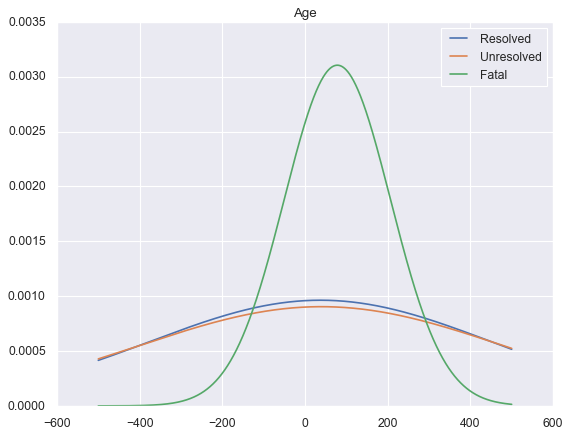

In [92]:
import scipy.stats as stats
x = np.linspace(-500, 500, 5000)
mu_1 = nb_clf.theta_[0][0]
sigma_1 = nb_clf.sigma_[0][0]
mu_2 = nb_clf.theta_[1][0]
sigma_2 = nb_clf.sigma_[1][0]
mu_3 = nb_clf.theta_[2][0]
sigma_3 = nb_clf.sigma_[2][0]
y_1 = stats.norm.pdf(x, mu_1, sigma_1) 
y_2 = stats.norm.pdf(x, mu_2, sigma_2) 
y_3 = stats.norm.pdf(x, mu_3, sigma_3) 

plt.plot(x, y_1, label='Resolved')
plt.plot(x, y_2, label='Unresolved')
plt.plot(x, y_3, label='Fatal')
plt.legend()
plt.title('Age');

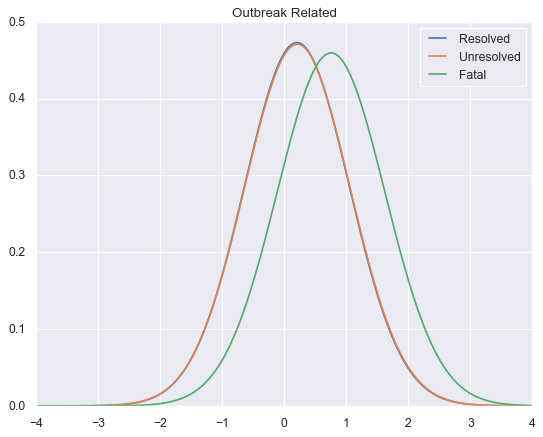

In [98]:
import scipy.stats as stats
x = np.linspace(-4, 4, 5000)
mu_1 = nb_clf.theta_[0][1]
sigma_1 = nb_clf.sigma_[0][1]
mu_2 = nb_clf.theta_[1][1]
sigma_2 = nb_clf.sigma_[1][1]
mu_3 = nb_clf.theta_[2][1]
sigma_3 = nb_clf.sigma_[2][1]
y_1 = stats.norm.pdf(x, mu_1, sigma_1) 
y_2 = stats.norm.pdf(x, mu_2, sigma_2) 
y_3 = stats.norm.pdf(x, mu_3, sigma_3) 

plt.plot(x, y_1, label='Resolved')
plt.plot(x, y_2, label='Unresolved')
plt.plot(x, y_3, label='Fatal')
plt.legend()
plt.title('Outbreak Related');

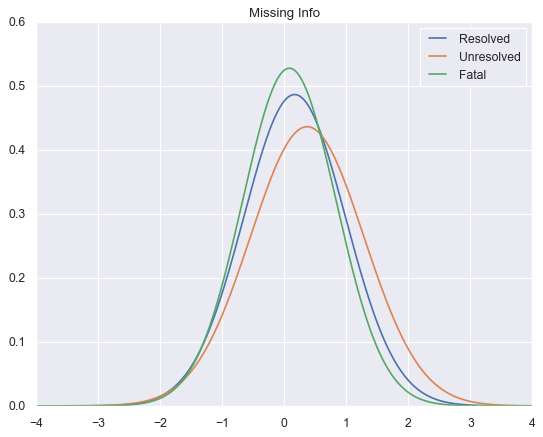

In [99]:
import scipy.stats as stats
x = np.linspace(-4, 4, 5000)
mu_1 = nb_clf.theta_[0][8]
sigma_1 = nb_clf.sigma_[0][8]
mu_2 = nb_clf.theta_[1][8]
sigma_2 = nb_clf.sigma_[1][8]
mu_3 = nb_clf.theta_[2][8]
sigma_3 = nb_clf.sigma_[2][8]
y_1 = stats.norm.pdf(x, mu_1, sigma_1) 
y_2 = stats.norm.pdf(x, mu_2, sigma_2) 
y_3 = stats.norm.pdf(x, mu_3, sigma_3) 

plt.plot(x, y_1, label='Resolved')
plt.plot(x, y_2, label='Unresolved')
plt.plot(x, y_3, label='Fatal')
plt.legend()
plt.title('Missing Info');

**As can be seen from the plots, the distributions of 'Age', 'whether it is outbreak related', 'whether the case acquisition method is missing' for each outcome match our conclusion in the decision tree.**

# Comparison of performance

In [100]:
from sklearn.metrics import confusion_matrix
pred = dt_clf.predict(X_test_2)
confusion_matrix(y_test_2, pred)

array([[628, 242, 102],
       [427, 419, 106],
       [ 56,  62, 837]])

In [101]:
from sklearn.metrics import confusion_matrix
pred = nb_clf.predict(X_test_2)
confusion_matrix(y_test_2, pred)

array([[562, 294, 116],
       [401, 416, 135],
       [ 20,  61, 874]])

**Based on the above two confusion matrix, we can see the distributions for the two confusion matrix are quite similar, which is an indicator that the decision tree and naive bayes classifier have similar performance on the covid dataset.\
Next, we take a further look at some specific performance metrics.**

In [102]:
pred = dt_clf.predict(X_test_2)
acc = accuracy_score(y_test_2,pred)
pre = precision_score(y_test_2,pred,average='macro')
recall = recall_score(y_test_2,pred,average='macro')
f = f1_score(y_test_2,pred,average='macro')
print("For Decision Tree classifier with max_depth equal to 10, the test accuracy score is "+str(acc))
print("For Decision Tree classifier with max_depth equal to 10, the test precision score is "+str(pre))
print("For Decision Tree classifier with max_depth equal to 10, the test recall score is "+str(recall))
print("For Decision Tree classifier with max_depth equal to 10, the test f1 score is "+str(f))

For Decision Tree classifier with max_depth equal to 10, the test accuracy score is 0.6543938867662383
For Decision Tree classifier with max_depth equal to 10, the test precision score is 0.6485810668858981
For Decision Tree classifier with max_depth equal to 10, the test recall score is 0.654218791991836
For Decision Tree classifier with max_depth equal to 10, the test f1 score is 0.6467583278996282


In [103]:
pred = nb_clf.predict(X_test_2)
acc = accuracy_score(y_test_2,pred)
pre = precision_score(y_test_2,pred,average='macro')
recall = recall_score(y_test_2,pred,average='macro')
f = f1_score(y_test_2,pred,average='macro')
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test accuracy score is "+str(acc))
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test precision score is "+str(pre))
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test recall score is "+str(recall))
print("For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test f1 score is "+str(f))

For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test accuracy score is 0.6432789162903786
For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test precision score is 0.6293890433375453
For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test recall score is 0.6434491121335958
For Gaussian Naive Bayes classifier with var_smoothing equal to 0.001, the test f1 score is 0.6327331255692171


**Due to higher accuracy of the decision tree classifier, the precison and recall score are both higher compared with the decision tree. Besides, the recall is higher than precision both for decision tree and naive bayes.\
Considering the complexity of the dataset, the decision tree which has more parameters to tune with has a better performance.**